# Porcupine Neural Networks

The code here is for testing PNN approximation on MNIST (only 0's and 1's).

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import pickle
import numpy as np
import matplotlib.pyplot as plt

import arch
import pnn

np.set_printoptions(precision=2,suppress=True)

%matplotlib inline

maindir = './temp_MNIST_1_2'
os.system('mkdir -p %s'%(maindir))

0

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

# subset to just 1's and 0's

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

keep_inds_train = (mnist.train.labels == 1) | (mnist.train.labels == 2)
Xtr = mnist.train.images[keep_inds_train]
Ytr = mnist.train.labels[keep_inds_train].astype(float).reshape(-1, 1)

keep_inds_test = (mnist.test.labels == 1) | (mnist.test.labels == 2)
Xtt = mnist.test.images[keep_inds_test]
Ytt = mnist.test.labels[keep_inds_test].astype(float).reshape(-1, 1)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Network parameters
num_epochs = 500
batch_size = 100
build_func = arch.mlp_noreluout_lastlayernottrainable
d = 784    # number of inputs
k_list = [512, 1024, 2048, 4096]

In [5]:
# Performance with a dense network
input_dict = dict(p=d, h=512)
save_file = '%s/mlp_noreluout_lastlayernottrainable.pickle'%(maindir)
build_func = arch.mlp_noreluout_lastlayernottrainable
pnn.build_graph_and_train(Xtr, Ytr, Xtt, Ytt, input_dict, build_func, save_file, batch_size=batch_size)

Train acc: 0.98206
Test acc: 0.98108


# PNN last layer not trainable

All last layer weights set to 1

In [6]:
build_func = arch.mlp_noreluout_lastlayernottrainable
save_pref = '%s/mlp_noreluout_lastlayernottrainable_PNN'%(maindir)
pnn.train_set_of_PNNs(Xtr, Ytr, Xtt, Ytt, k_list, d, build_func, save_pref,
                      num_epochs=num_epochs, batch_size=batch_size, w2_init_mode=1)

Num final lines close to original: 512
Train acc: 0.98626
Test acc: 0.98846
Num final lines close to original: 1023
Train acc: 0.99167
Test acc: 0.99400
Num final lines close to original: 2047
Train acc: 0.99184
Test acc: 0.98939
Num final lines close to original: 4093
Train acc: 0.98412
Test acc: 0.99031


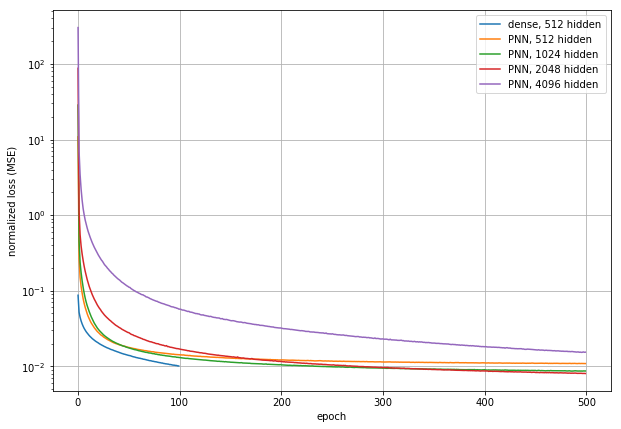

In [7]:
# Plot all losses
plt.figure(figsize=(10, 7))
loss = pickle.load(file('%s/mlp_noreluout_lastlayernottrainable.pickle'%(maindir), 'rb'))[0]
plt.plot(loss, label='dense, 512 hidden')
pnn.plot_losses(k_list, save_pref)
plt.xlabel('epoch')
plt.ylabel('normalized loss (MSE)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

### last layer not trainable but initialized to smaller values (normal distribution with std 1/sqrt(k))

In [8]:
build_func = arch.mlp_noreluout_lastlayernottrainable
save_pref = '%s/mlp_noreluout_lastlayernottrainable_PNN_smallw2init'%(maindir)
pnn.train_set_of_PNNs(Xtr, Ytr, Xtt, Ytt, k_list, d, build_func, save_pref,
                      num_epochs=num_epochs, batch_size=batch_size, w2_init_mode=2)

Num final lines close to original: 508
Train acc: 0.90703
Test acc: 0.91186
Num final lines close to original: 1006
Train acc: 0.90523
Test acc: 0.90401
Num final lines close to original: 2023
Train acc: 0.90154
Test acc: 0.89340
Num final lines close to original: 4066
Train acc: 0.91398
Test acc: 0.91371


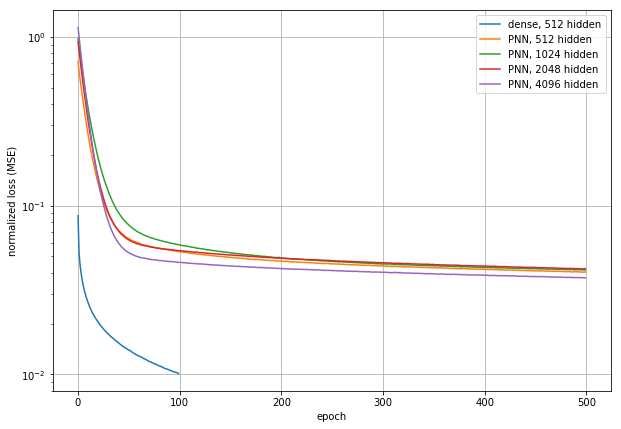

In [9]:
# Plot all losses
plt.figure(figsize=(10, 7))
loss = pickle.load(file('%s/mlp_noreluout_lastlayernottrainable.pickle'%(maindir), 'rb'))[0]
plt.plot(loss, label='dense, 512 hidden')
pnn.plot_losses(k_list, save_pref)
plt.xlabel('epoch')
plt.ylabel('normalized loss (MSE)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

### last layer not trainable but initialized to smaller positive values (absolute value of normal distribution with std 1/sqrt(k))

In [10]:
build_func = arch.mlp_noreluout_lastlayernottrainable
save_pref = '%s/mlp_noreluout_lastlayernottrainable_PNN_smallw2initpos'%(maindir)
pnn.train_set_of_PNNs(Xtr, Ytr, Xtt, Ytt, k_list, d, build_func, save_pref,
                      num_epochs=num_epochs, batch_size=batch_size, w2_init_mode=3)

Num final lines close to original: 512
Train acc: 0.93570
Test acc: 0.93216
Num final lines close to original: 1024
Train acc: 0.93519
Test acc: 0.92986
Num final lines close to original: 2048
Train acc: 0.94806
Test acc: 0.94462
Num final lines close to original: 4069
Train acc: 0.94746
Test acc: 0.94324


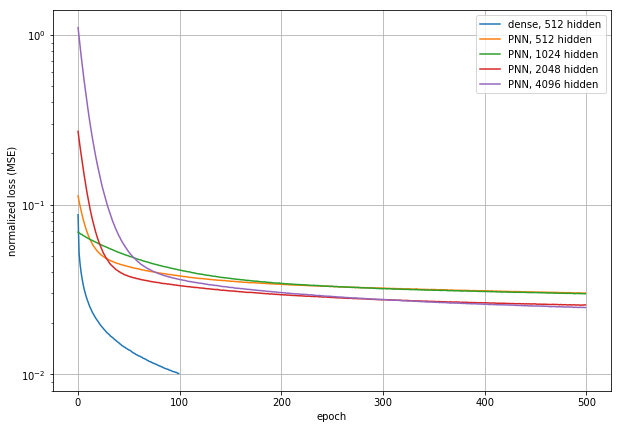

In [11]:
# Plot all losses
plt.figure(figsize=(10, 7))
loss = pickle.load(file('%s/mlp_noreluout_lastlayernottrainable.pickle'%(maindir), 'rb'))[0]
plt.plot(loss, label='dense, 512 hidden')
pnn.plot_losses(k_list, save_pref)
plt.xlabel('epoch')
plt.ylabel('normalized loss (MSE)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

# PNN last layer trainable

In [12]:
build_func = arch.mlp_noreluout
save_pref = '%s/mlp_noreluout_PNN'%(maindir)
pnn.train_set_of_PNNs(Xtr, Ytr, Xtt, Ytt, k_list, d, build_func, save_pref,
                      num_epochs=num_epochs, batch_size=batch_size, w2_init_mode=2)

Num final lines close to original: 512
Train acc: 0.98772
Test acc: 0.98892
Num final lines close to original: 1024
Train acc: 0.99279
Test acc: 0.99308
Num final lines close to original: 2048
Train acc: 0.99571
Test acc: 0.99492
Num final lines close to original: 4096
Train acc: 0.99708
Test acc: 0.99585


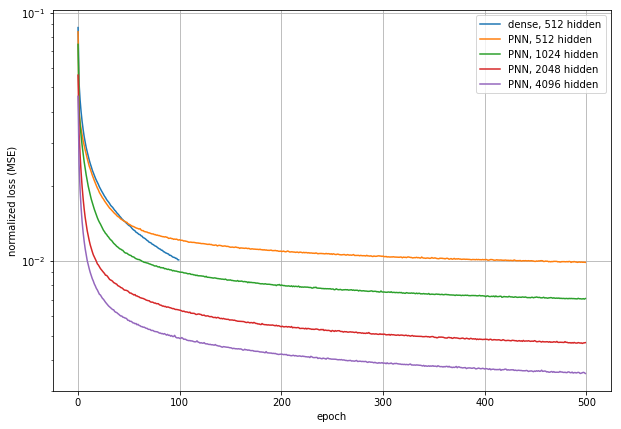

In [13]:
# Plot all losses
plt.figure(figsize=(10, 7))
loss = pickle.load(file('%s/mlp_noreluout_lastlayernottrainable.pickle'%(maindir), 'rb'))[0]
plt.plot(loss, label='dense, 512 hidden')
pnn.plot_losses(k_list, save_pref)
plt.xlabel('epoch')
plt.ylabel('normalized loss (MSE)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()